In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pd.__version__

'2.3.1'

In [7]:
sns.set(style="whitegrid", palette="muted", font_scale=1.2)


In [8]:
df = pd.read_csv('../data/raw/wine-quality-red.csv', sep=';')
df = pd.read_csv('../data/raw/wine-quality-white.csv', sep=';')


In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (4898, 12)


In [11]:
print("Columns:", df.columns.tolist())

Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [13]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [14]:
print("\nMissing values in dataset:")
print(df.isnull().sum())


Missing values in dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


/tmp/ipykernel_28489/997829843.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="quality", data=df, palette="viridis")


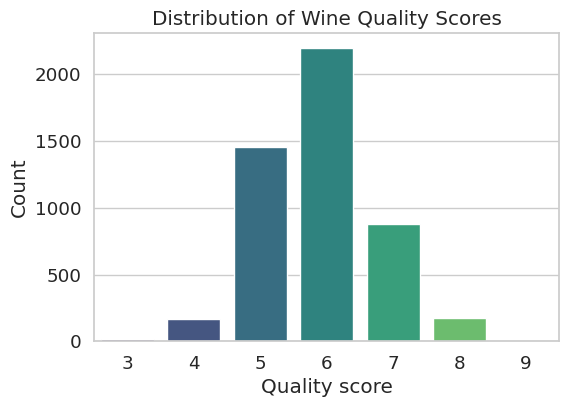

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x="quality", data=df, palette="viridis")
plt.title("Distribution of Wine Quality Scores")
plt.xlabel("Quality score")
plt.ylabel("Count")
plt.show()

In [16]:
df["quality_label"] = df["quality"].apply(lambda x: 1 if x >= 7 else 0)

/tmp/ipykernel_28489/2216903899.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="quality_label", data=df, palette="viridis")


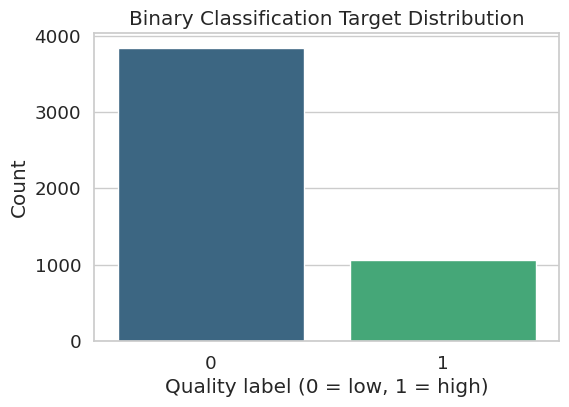


Value counts of binary label:
quality_label
0    3838
1    1060
Name: count, dtype: int64


In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x="quality_label", data=df, palette="viridis")
plt.title("Binary Classification Target Distribution")
plt.xlabel("Quality label (0 = low, 1 = high)")
plt.ylabel("Count")
plt.show()

print("\nValue counts of binary label:")
print(df["quality_label"].value_counts())

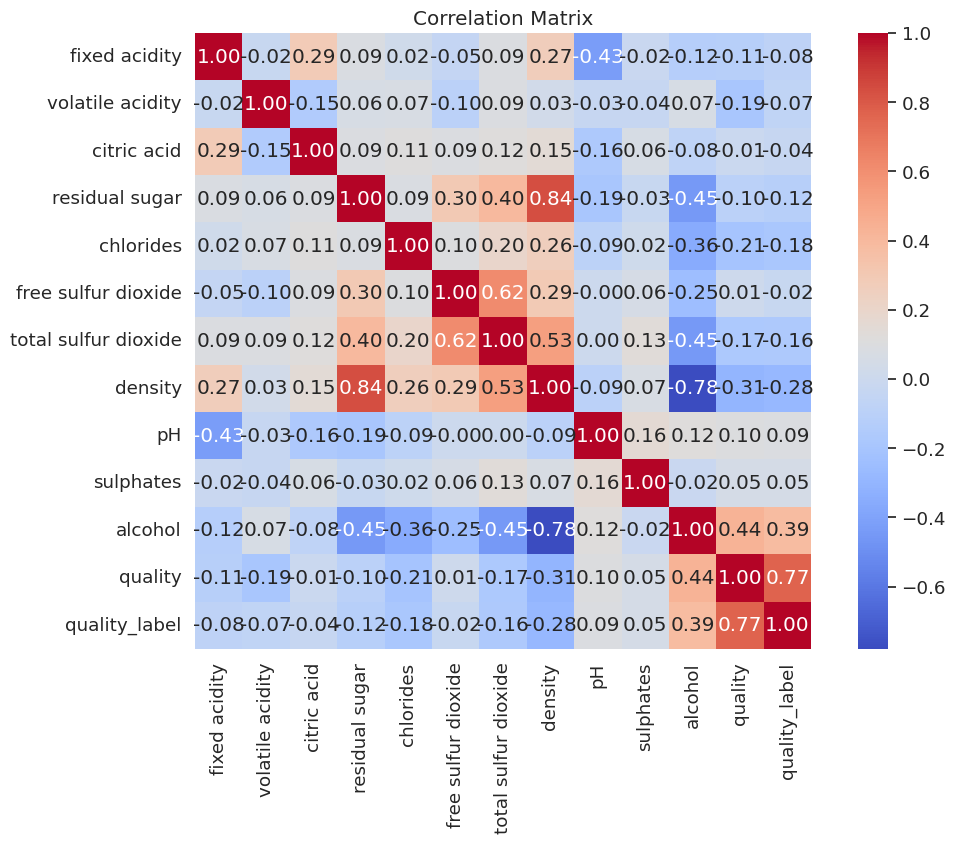

In [18]:
corr = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

In [19]:
target_corr = corr["quality_label"].sort_values(ascending=False)
print("\nCorrelation with target label:")
print(target_corr)


Correlation with target label:
quality_label           1.000000
quality                 0.769486
alcohol                 0.385132
pH                      0.093510
sulphates               0.047410
free sulfur dioxide    -0.023413
citric acid            -0.035330
volatile acidity       -0.067225
fixed acidity          -0.080748
residual sugar         -0.117085
total sulfur dioxide   -0.162202
chlorides              -0.183118
density                -0.283871
Name: quality_label, dtype: float64


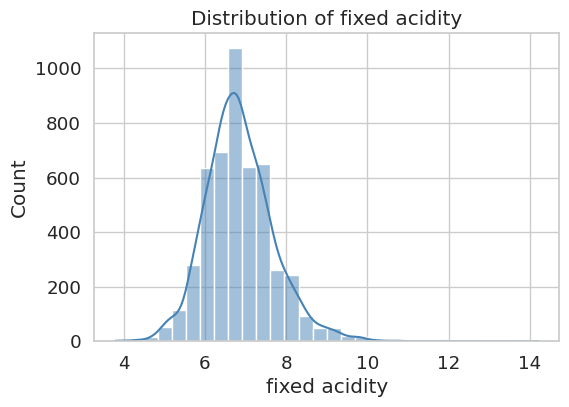

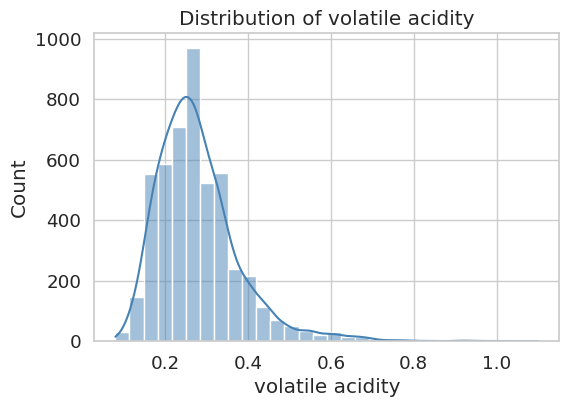

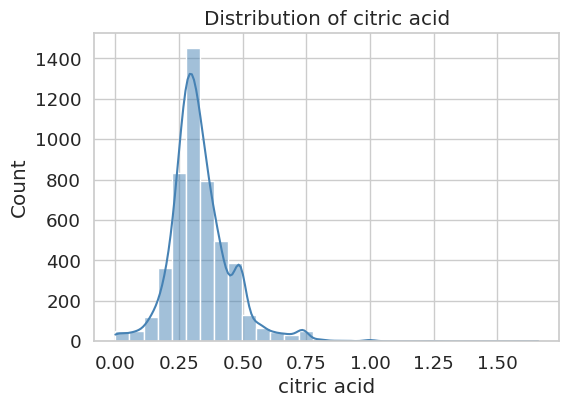

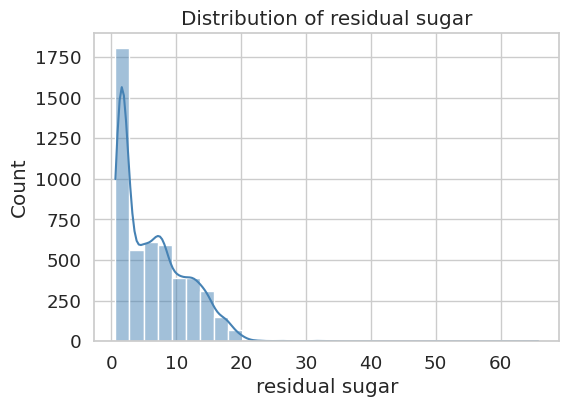

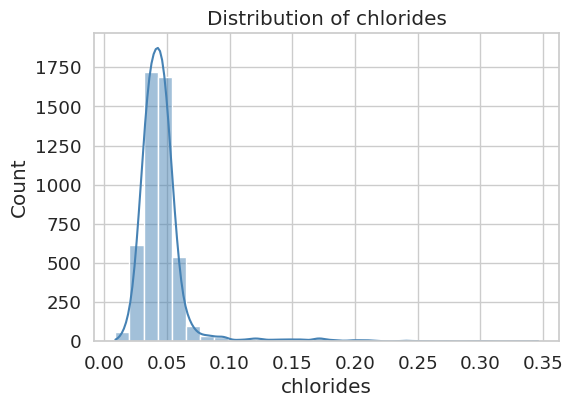

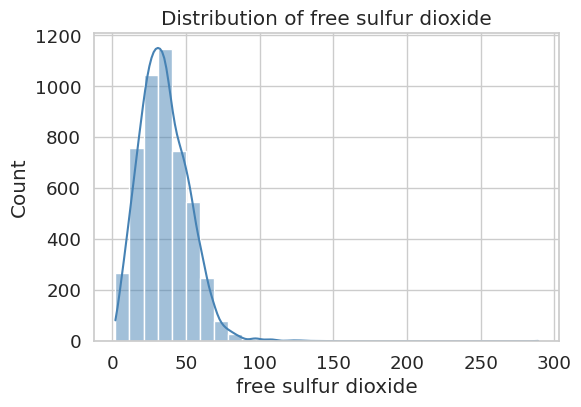

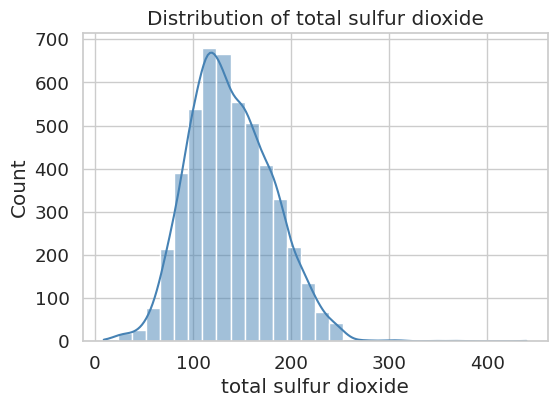

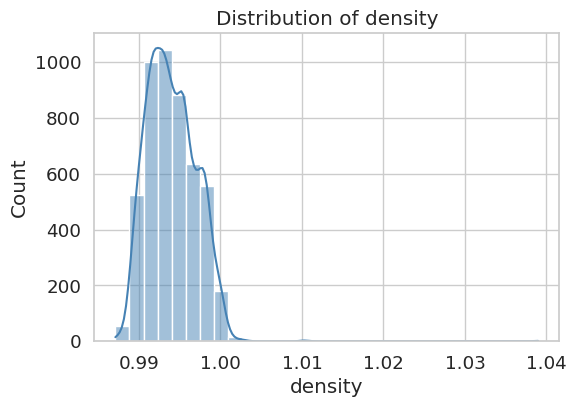

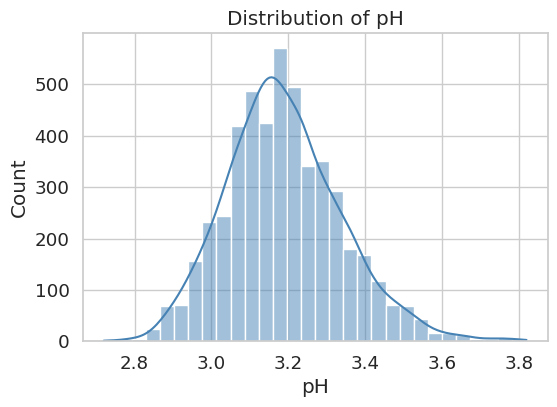

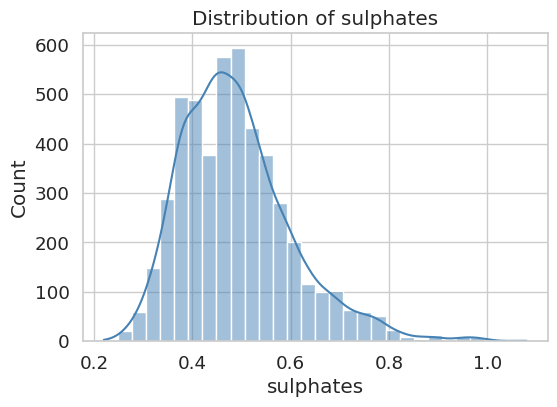

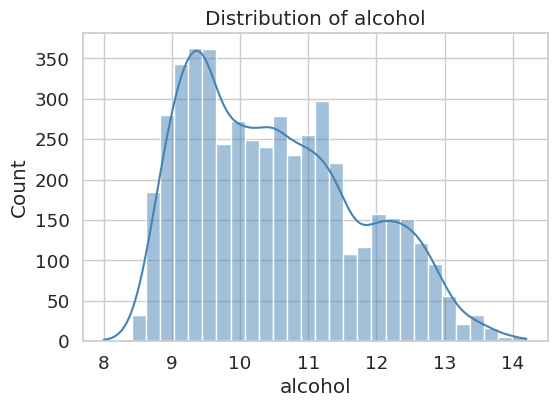

In [20]:
numeric_features = df.columns.drop(["quality", "quality_label"])

for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color='steelblue')
    plt.title(f"Distribution of {col}")
    plt.show()

/tmp/ipykernel_28489/3992616944.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality_label", y=col, data=df, palette="Set2")


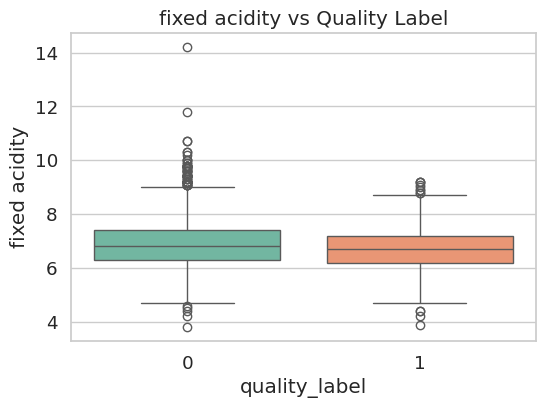

/tmp/ipykernel_28489/3992616944.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality_label", y=col, data=df, palette="Set2")


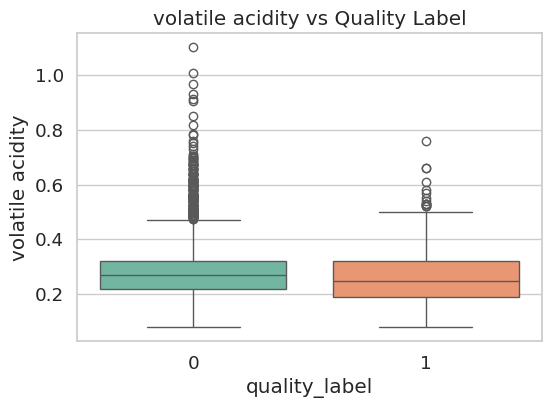

/tmp/ipykernel_28489/3992616944.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality_label", y=col, data=df, palette="Set2")


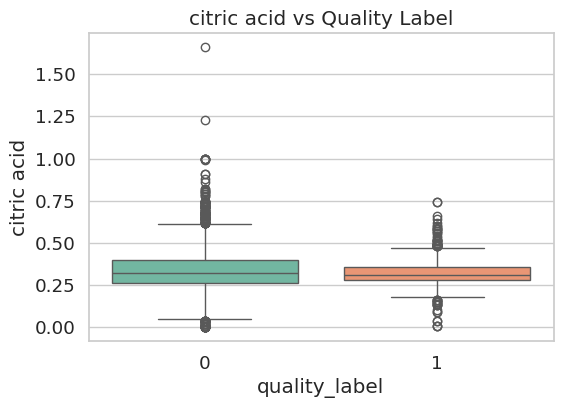

/tmp/ipykernel_28489/3992616944.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality_label", y=col, data=df, palette="Set2")


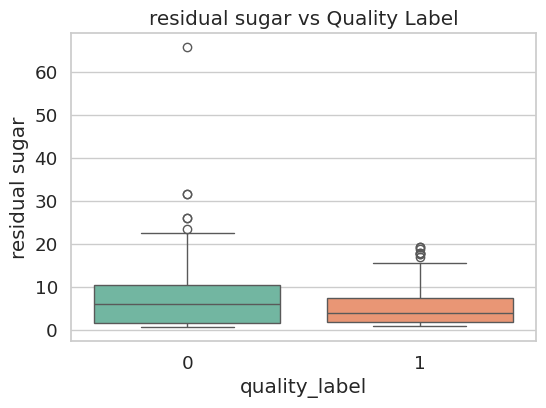

/tmp/ipykernel_28489/3992616944.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality_label", y=col, data=df, palette="Set2")


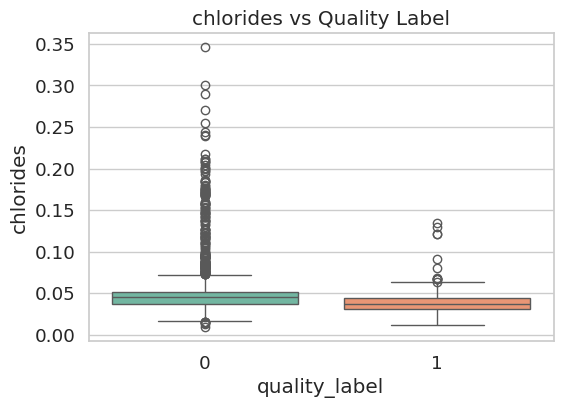

/tmp/ipykernel_28489/3992616944.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality_label", y=col, data=df, palette="Set2")


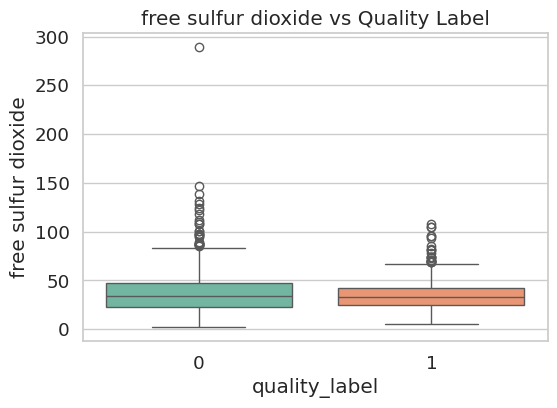

/tmp/ipykernel_28489/3992616944.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality_label", y=col, data=df, palette="Set2")


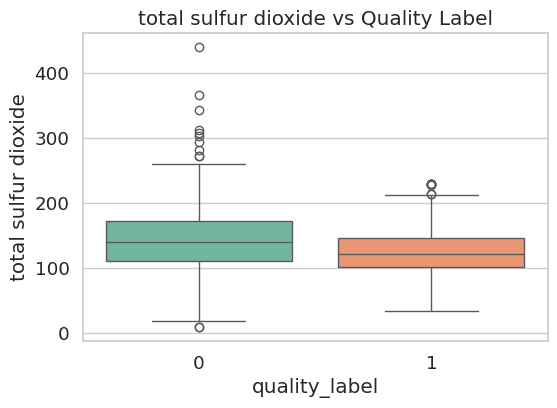

/tmp/ipykernel_28489/3992616944.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality_label", y=col, data=df, palette="Set2")


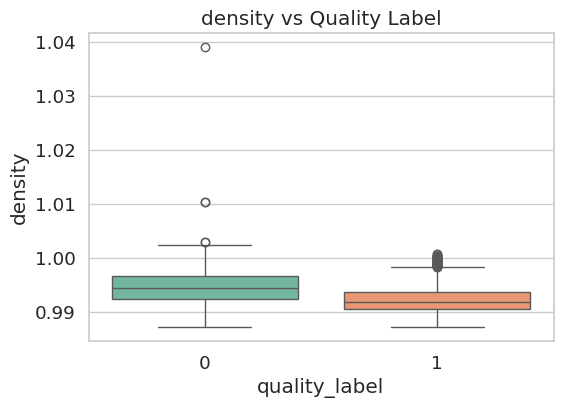

/tmp/ipykernel_28489/3992616944.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality_label", y=col, data=df, palette="Set2")


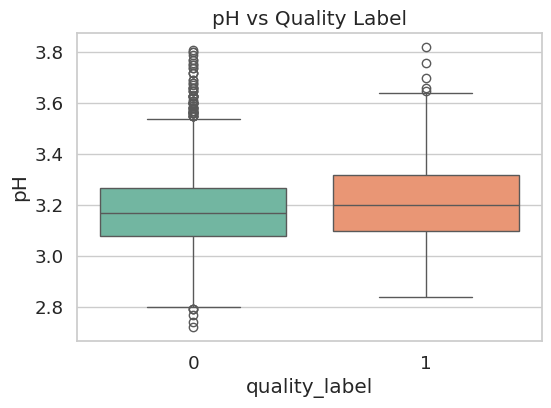

/tmp/ipykernel_28489/3992616944.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality_label", y=col, data=df, palette="Set2")


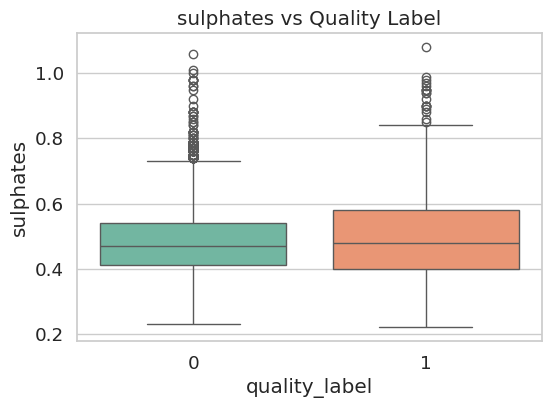

/tmp/ipykernel_28489/3992616944.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality_label", y=col, data=df, palette="Set2")


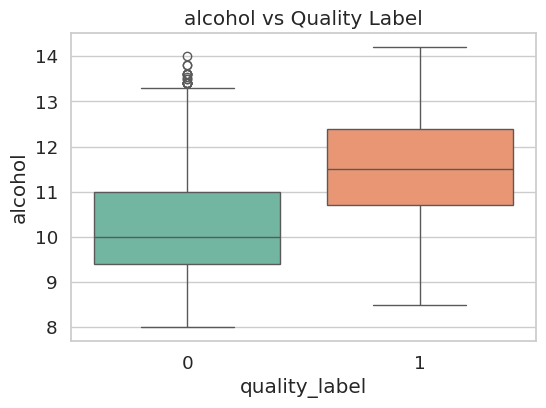

In [21]:
for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="quality_label", y=col, data=df, palette="Set2")
    plt.title(f"{col} vs Quality Label")
    plt.show()

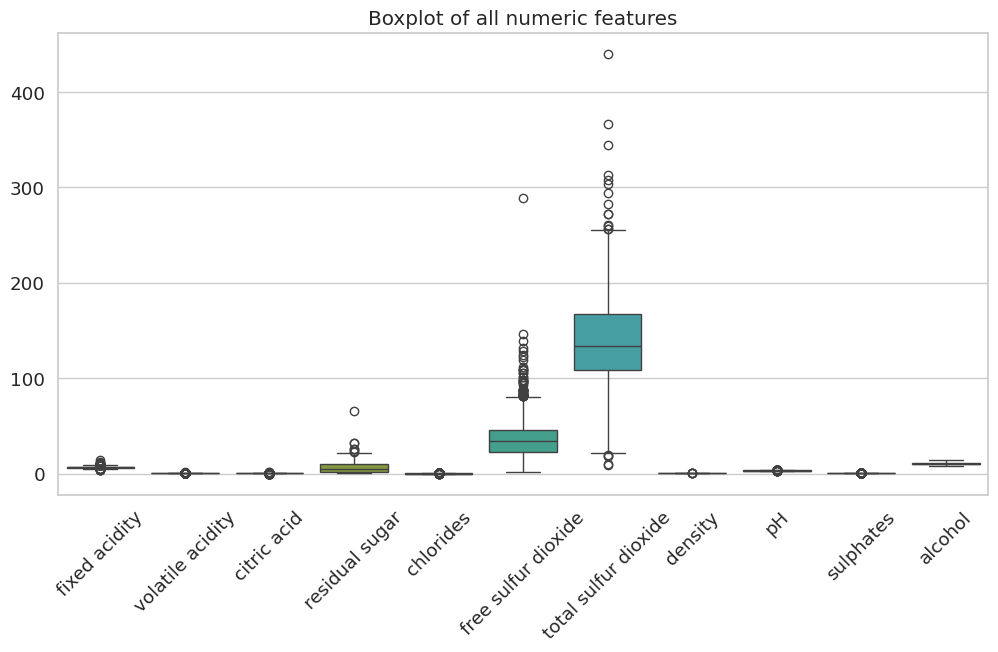

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_features])
plt.xticks(rotation=45)
plt.title("Boxplot of all numeric features")
plt.show()